<a href="https://colab.research.google.com/github/LeeEdzl/Colabwork/blob/main/4_3_%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#데이터 세트
#https://raw.githubusercontent.com/jmnote/zdata/master/R/iris.csv

<h3>입력데이터와 정답 데이터를 생성
<p>입력데이터는 iris_input 정답데이터는 iris_target으로 설정 (5번째까지의 데이터 각각 출력)

In [ ]:
import pandas as pd
flower = pd.read_csv('https://raw.githubusercontent.com/jmnote/zdata/master/R/iris.csv')
flower.head(5)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
iris_input = flower[['Sepal.Length','Sepal.Width','Petal.Length','Petal.Width']].to_numpy()
iris_target = flower['Species'].to_numpy()

<h3>훈련 세트와 데이터 세트로 나누기
<p>train_input, test_input, train_target, test_target
<p>train_input과 train_target의 형태를 출력하자

In [ ]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(iris_input, iris_target, stratify=iris_target, random_state=42)
print(train_input.shape,test_input.shape)

(112, 4) (38, 4)


<h3>데이터 표준화
<p>훈련세트와 테스트 세트를 표준화하자

In [ ]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

<h3>k-최근접 이웃 알고리즘을 이용하여 훈련하고 훈련 세트와 테스트 세트에 대해 평가하자

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier(n_neighbors=3)
kn.fit(train_scaled, train_target)

print(kn.score(train_scaled, train_target))
print(kn.score(test_scaled, test_target))

0.9642857142857143
0.9210526315789473


In [ ]:
print(kn.classes_)

['setosa' 'versicolor' 'virginica']


<h3>테스트 세트의 5개의 데이터에 대해서 예측과 확률을 알아보자
<p>각 확률이 어떤 클래스를 뜻하는지 알아보자

In [ ]:
print(kn.predict(test_scaled[:5]))

['setosa' 'versicolor' 'versicolor' 'versicolor' 'setosa']


In [ ]:
import numpy as np
proba = kn.predict_proba(test_scaled[:5])
print(np.round(proba, decimals=4))

[[1.     0.     0.    ]
 [0.     0.6667 0.3333]
 [0.     1.     0.    ]
 [0.     1.     0.    ]
 [1.     0.     0.    ]]


<h3>최적화해보자

In [ ]:
score_train=[]
score_test=[]

for i in range(2,16):
  kne = KNeighborsClassifier(n_neighbors=i)
  kne.fit(train_scaled, train_target)
  score_train.append(kne.score(train_scaled, train_target))
  score_test.append(kne.score(test_scaled, test_target))

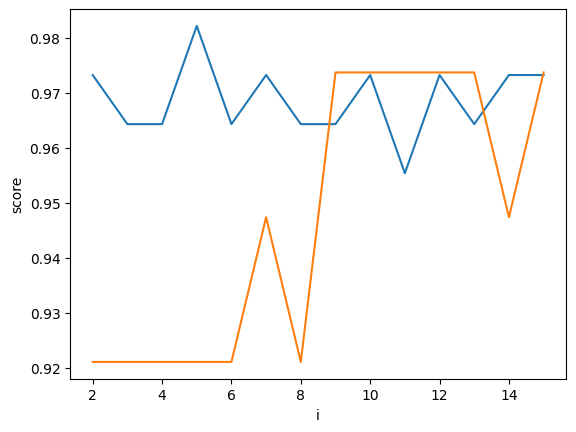

In [ ]:
import matplotlib.pyplot as plt
x = np.arange(2,16,1)
plt.plot(x,score_train)
plt.plot(x,score_test)
plt.xlabel('i')
plt.ylabel('score')
plt.show()